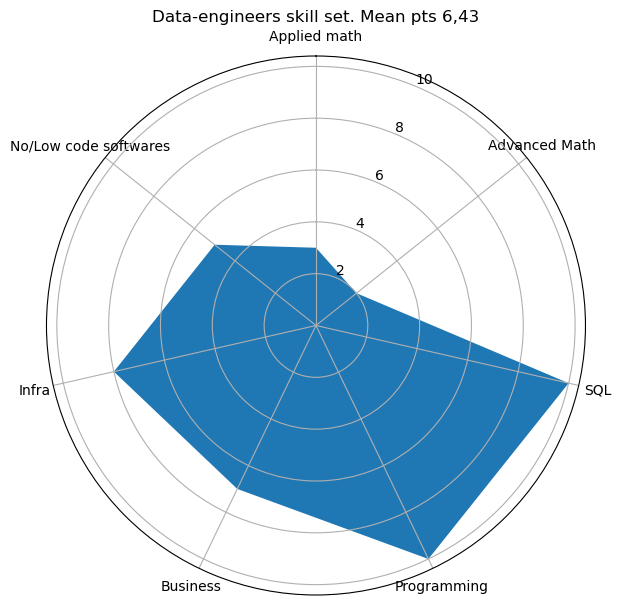

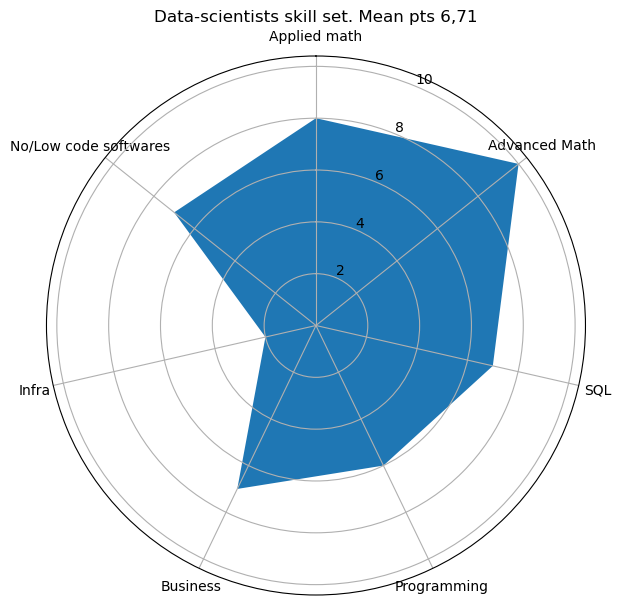

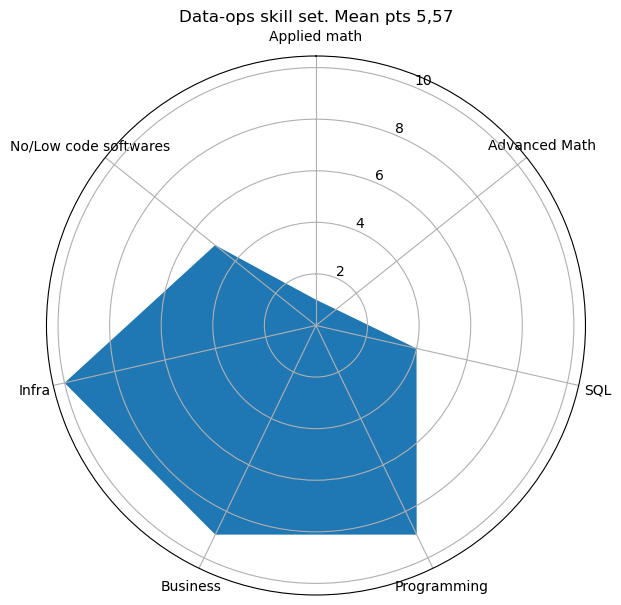

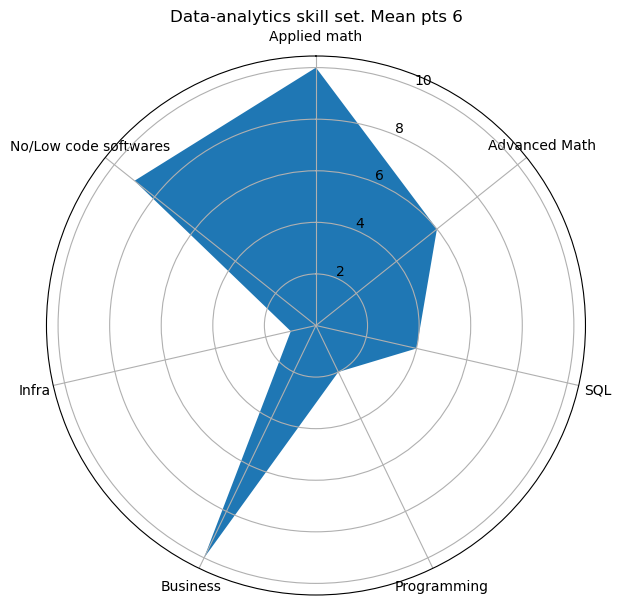

In [139]:
from pandas import DataFrame


#READ SKILL DATASET
def readData() -> list:
    import pandas as pd
    df = pd.read_csv(r'../data/skill-dataset.csv',sep=';')
    return df


#MAKE VARIABLES FOR PLOT GRAPHICS
def variables() -> [DataFrame, list, list]:
    df = readData()
    dfWithoutRole = df[['Applied math','Advanced Math','SQL','Programming','Business','Infra','No/Low code softwares']]
    categories = list(dfWithoutRole.columns)
    positions = df['Role'].tolist()

    return dfWithoutRole,categories,positions


#PLOT GRAPHICS
def matplotCharts():
    import matplotlib.pyplot as plt
    import numpy as np

    dfM, categories, positions = variables()
    df = readData()

    for num,role in enumerate(positions):
        fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
        label_loc = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        mean = str(df['Mean'].iloc[num])
        plt.title(f"{role} skill set. Mean pts {mean}")
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        values = dfM.iloc[num].tolist()
        ax.fill(label_loc,values,label=role)
        ax.set_thetagrids(np.degrees(label_loc),labels=categories)

#PLOTS DYNAMIC CHARTS
def plotlyCharts():
    import plotly.graph_objects as go
    dfM, categories, positions = variables()
    df = readData()

    fig = go.Figure()

    for n,pos in enumerate(positions):
        fig.add_trace(go.Scatterpolar(
            r = dfM.iloc[n].tolist(),
            theta=categories,
            fill='toself',
            name=pos
        ))

    fig.show()

matplotCharts()
plotlyCharts()